In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import UsefulFunctions as UF


In [3]:
root = UF.DataRoot()

csv_url = root + "Aaron\\ProstateMRL\\Data\\MRLPacks\\Features_v2\\All_pyRad_Features.csv"
all_df = pd.read_csv(csv_url)
all_df = all_df.drop(columns=['Unnamed: 0'])

Norms = all_df['Normalisation'].unique()
Regions = all_df['Region'].unique()
Treatments = all_df['Treatment'].unique()
Signals = ["Mean, Median"]

In [4]:
rgb_vals = sns.color_palette("colorblind", len(Regions))
colourmap = dict(zip(Norms, rgb_vals))

In [ ]:
for t in Treatments:
    t_df = all_df.loc[all_df.Treatment == t]
    PatIDs = t_df.PatID.unique()
    print(PatIDs)
    #t_df = t_df.loc[t_df.Region == "Prostate"]
    signal = "original_firstorder_Median"

    for p in PatIDs:
        print("Processing: {}".format(p))
        p_df = t_df.loc[t_df.PatID == p]
        ax_up, ax_low = np.abs(p_df.original_firstorder_Median.max()), np.abs(p_df.original_firstorder_Median.min())
        if ax_up < ax_low:
            lim = ax_low
        else: 
            lim = ax_up
        lim = lim + 10

        sns.set_theme(style='darkgrid')
        plt.clf()
        fig, axes = plt.subplots(3,3,sharex=True,figsize=(25,15))
        fig.suptitle("Patient: {} - Treatment: {}".format(p,t), fontsize=30)
        #fig.suptitle("Patient: {}".format(p), fontsize=30)
        plt.setp(axes, ylim = (0, lim))

        for i in range(3):
            j=i*3

            plot_df = p_df.loc[p_df.Normalisation == Norms[j]]
            axes[i,0].set_title(Norms[j], fontsize=20)
            axes[i,0].set_ylabel("Entropy", fontsize=16)
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,0], x="DaysDiff", y=signal, hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,0], marker="s", x="DaysDiff", y=signal, hue="Region",  legend=False)
           # plot_3 = sns.scatterplot(data=plot_df, ax=axes[i,0], marker="o", x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
           # plot_4 = sns.lineplot(data=plot_df, ax=axes[i,0], linestyle="dashed",x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)

            plot_df = p_df.loc[p_df.Normalisation == Norms[j+1]]
            axes[i,1].set_title(Norms[j+1], fontsize=20)
            axes[i,1].set_ylabel(" ")
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,1], x="DaysDiff", y=signal, hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,1], marker="s", x="DaysDiff", y=signal, hue="Region",  legend=False)
            #plot_3 = sns.scatterplot(data=plot_df, ax=axes[i,1], marker="o", x="DaysDiff", y="original_firstorder_Entropy", hue="Region",  legend=False)
            #plot_4 = sns.lineplot(data=plot_df, ax=axes[i,1], linestyle="dashed",x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)

            plot_df = p_df.loc[p_df.Normalisation == Norms[j+2]]
            axes[i,2].set_title(Norms[j+2], fontsize=20)
            axes[i,2].set_ylabel(" ")
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,2], x="DaysDiff", y=signal, hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,2], marker="s", x="DaysDiff", y=signal, hue="Region",  legend=False)
            #plot_3 = sns.scatterplot(data=plot_df, ax=axes[i,2], marker="o", x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
            #plot_4 = sns.lineplot(data=plot_df, ax=axes[i,2], linestyle="dashed",x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
            
            axes[2,0].set_xlabel("Days From Fraction 1", fontsize=16)
            axes[2,1].set_xlabel("Days From Fraction 1", fontsize=16)
            axes[2,2].set_xlabel("Days From Fraction 1", fontsize=16)
            
        fig.legend()
        sns.move_legend(fig, labels=Regions,loc="lower center", ncol=3, title="Region", frameon=True)
        
        fig.savefig("D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\SignalPlots_v2\\" + t + "_" + str(p) + "Entropy.png", dpi=300)    
        plt.show()
        print("-------------------------------------")
            

In [ ]:
for t in Treatments:
    t_df = all_df.loc[all_df.Treatment == t]
    t_df = t_df.loc[t_df.Region == "Prostate"]
    t_df = t_df[["PatID", "DaysDiff", "Normalisation", "original_firstorder_Entropy", "original_firstorder_Skewness", "original_firstorder_Variance", "original_firstorder_Uniformity"]]
    features = 

    for p in PatIDs:
        p_df = t_df.loc[t_df.PatID == p]

        sns.set_theme(style='darkgrid')
        plt.clf()
        fig, axes = plt.subplots(2,2,sharex=True,figsize=(25,15))
        fig.suptitle("Patient: {} - Treatment: {}".format(p,t), fontsize=30)
        #fig.suptitle("Patient: {}".format(p), fontsize=30)
        #plt.setp(axes, ylim = (0, lim))

        for i in range(3):
            j=i*3

            plot_df = p_df.loc[p_df.Normalisation == Norms[j]]
            axes[i,0].set_title(Norms[j], fontsize=20)
            axes[i,0].set_ylabel("Signal", fontsize=16)
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,0], x="DaysDiff", y="original_firstorder_Mean", hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,0], marker="s", x="DaysDiff", y="original_firstorder_Mean", hue="Region",  legend=False)
            plot_3 = sns.scatterplot(data=plot_df, ax=axes[i,0], marker="o", x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
            plot_4 = sns.lineplot(data=plot_df, ax=axes[i,0], linestyle="dashed",x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)

            plot_df = p_df.loc[p_df.Normalisation == Norms[j+1]]
            axes[i,1].set_title(Norms[j+1], fontsize=20)
            axes[i,1].set_ylabel(" ")
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,1], x="DaysDiff", y="original_firstorder_Mean", hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,1], marker="s", x="DaysDiff", y="original_firstorder_Mean", hue="Region",  legend=False)
            plot_3 = sns.scatterplot(data=plot_df, ax=axes[i,1], marker="o", x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
            plot_4 = sns.lineplot(data=plot_df, ax=axes[i,1], linestyle="dashed",x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)

            plot_df = p_df.loc[p_df.Normalisation == Norms[j+2]]
            axes[i,2].set_title(Norms[j+2], fontsize=20)
            axes[i,2].set_ylabel(" ")
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,2], x="DaysDiff", y="original_firstorder_Mean", hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,2], marker="s", x="DaysDiff", y="original_firstorder_Mean", hue="Region",  legend=False)
            plot_3 = sns.scatterplot(data=plot_df, ax=axes[i,2], marker="o", x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
            plot_4 = sns.lineplot(data=plot_df, ax=axes[i,2], linestyle="dashed",x="DaysDiff", y="original_firstorder_Median", hue="Region",  legend=False)
            
            axes[2,0].set_xlabel("Days From Fraction 1", fontsize=16)
            axes[2,1].set_xlabel("Days From Fraction 1", fontsize=16)
            axes[2,2].set_xlabel("Days From Fraction 1", fontsize=16)
            
        fig.legend()
        sns.move_legend(fig, labels=Regions,loc="lower center", ncol=3, title="Region", frameon=True)
        
        fig.savefig("D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\SignalPlots_v2\\" + t + "_" + str(p) + ".png", dpi=300)    
        plt.show()
        print("-------------------------------------")

        

d:\data\Aaron\ProstateMRL\py-envs\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


      PatID  DaysDiff Normalisation  original_firstorder_Median
0         0         0           Raw                   33.000000
3         3         0         HM-TP                   30.000000
6         6         0         HM-FS                   33.000000
9         9         0     Norm-Pros                   33.000000
12       12         0    Norm-Glute                   33.000000
...     ...       ...           ...                         ...
1146   1146        10    Norm-Glute                   43.372028
1149   1149        10    Norm-Psoas                   32.580529
1152   1152        10      Med-Pros                   29.000000
1155   1155        10     Med-Glute                   43.333333
1158   1158        10     Med-Psoas                   30.952381

[387 rows x 4 columns]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

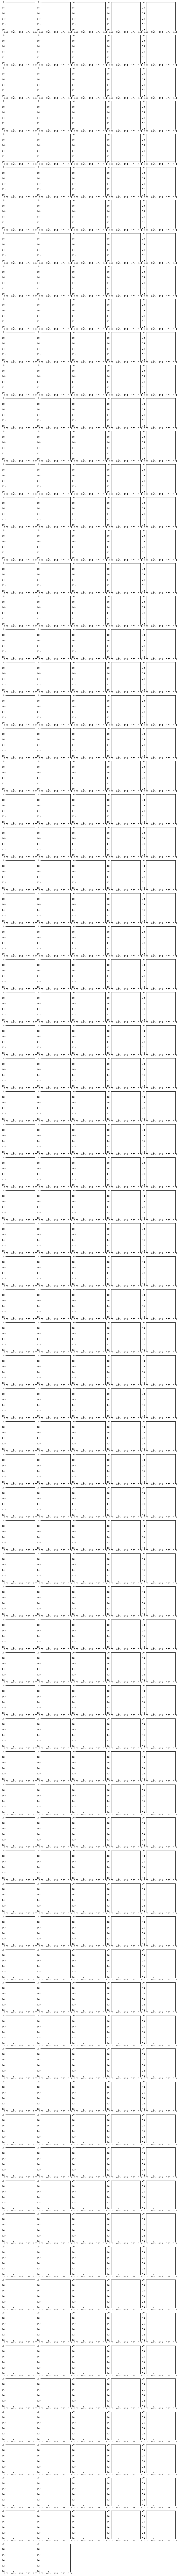

In [7]:
for t in Treatments:
    t_df = all_df.loc[all_df.Treatment == t]
    t_df = t_df.loc[t_df.Region == "Prostate"]
    
    t_df = t_df.drop(t_df.iloc[:,6:28], axis=1)
    plot_df = t_df[["PatID", "DaysDiff", "Normalisation", "original_firstorder_Median"]]
    plot_df["PatID"] = plot_df.index
    print(plot_df)
    plt.clf()
    g = sns.FacetGrid(plot_df, col="PatID", col_wrap=5)
    g.map(sns.lineplot, x="DaysDiff", y="original_firstorder_Median")#, hue="Normalisation")
    plt.show()


In [ ]:
rgb_vals = sns.color_palette("colorblind", len(Regions))
colourmap = dict(zip(Regions, rgb_vals))

for t in treatments:
    t_df = sig_all_df.loc[sig_all_df.Treatment == t]
    patIDs = t_df.PatID.unique()
    print(patIDs)

    for p in patIDs:
        print("Processing: " + str(p))
        p_df = t_df.loc[t_df.PatID == p]
        ax_up, ax_low = np.abs(p_df.MeanDiff.max()), np.abs(p_df.MeanDiff.min())
        if ax_up < ax_low:
            lim = ax_low
        else: 
            lim = ax_up
        lim = lim + 10

        sns.set_theme(style='darkgrid')
        plt.clf()
        fig, axes = plt.subplots(3,2,sharex=False,figsize=(15,25))
        
        plt.xlabel("Days from Fraction 1")   
        plt.ylabel("Mean Signal")
        fig.suptitle("Patient: " + str(p), fontsize=40)
        plt.setp(axes, ylim = (lim*-1, lim))

        for i in range(3):
            j=i*2
            
            plot_df = p_df.loc[p_df.Normalisation == norms[j]]
            axes[i,0].set_title(norms[j], fontsize=24)
            axes[i,0].set_xlabel("Days From Fraction 1")
            axes[i,0].set_ylabel("Mean Signal Change")
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,0], x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,0],  x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)

            plot_df = p_df.loc[p_df.Normalisation == norms[j+1]]
            axes[i,1].set_title(norms[j+1], fontsize=24)
            axes[i,1].set_xlabel("Days From Fraction 1")
            axes[i,1].set_ylabel("Mean Signal Change")
            plot_1 = sns.lineplot(data=plot_df, ax=axes[i,1], x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)
            plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,1],  x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)

            # if i == 2:
            #     axes[i,0].set_xlabel("")
            #     axes[i,1].set_xlabel("")

        leg = fig.legend()
        #fig.tight_layout()
        sns.move_legend(fig, labels=Regions,loc="lower center", ncol=3, title="Region", frameon=True)
        #plt.setp(leg.get_legend().get_texts(), fontsize='22') # for legend text
        #plt.setp(leg.get_legend().get_title(), fontsize='32') # for legend title

        fig.savefig("D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\SignalPlots\\" + t[0:4] + "_" + str(p) + "_vert.png", dpi=300)    
        print("-------------------------------------")
            

In [ ]:
features = ["original_firstorder_Entropy", "original_firstorder_Uniformity", 'original_firstorder_RootMeanSquared', 'original_firstorder_InterquartileRange', "original_firstorder_Variance", "original_firstorder_Energy"]
# "original_firstorder_Skewness", "original_firstorder_Kurtosis",
key_df = pd.read_csv("D:\\data\\Aaron\\ProstateMRL\\Data\\PatientKey_sorted.csv")
treatments = key_df.Treatment.unique()


feature_url = "D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\FeatureExtraction\\"
features_dir = os.listdir(feature_url)

Norms = sig_all_df.Normalisation.unique()
print(Norms)

all_ft_df = pd.DataFrame()
for n in Norms:
    print(n)
    all_df = pd.DataFrame()
    sig_all_df = sig_all_df.loc[sig_all_df.Region == "Prostate"]
    sig_n_df = sig_all_df.loc[sig_all_df.Normalisation == n]
    for t in treatments:
        sig_t_df = sig_n_df.loc[sig_n_df.Treatment == t]
        ft_t_df = key_df.loc[key_df.Treatment == t]
        patIDs = ft_t_df.Patient.unique()
        
        for p in patIDs:
            sig_p_df = sig_t_df.loc[sig_t_df.PatID == p]
            ft_p_df = ft_t_df.loc[ft_t_df.Patient == p]
            
            p_l = UF.FixPatID(p)
            if p_l == "0001464":
                if t == "SABR":
                    p_l = str(p_l) + "_" + t
                else:
                    p_l = str(p_l) + "_20f"
            
            scans = ft_p_df.Scan.unique()
            print(p_l)
            pat_df = pd.DataFrame()

            for s in scans:
                ft_csvs = os.listdir((feature_url + str(p_l) + "\\" +str(s)))

                for k in ft_csvs:
                    
                    csv_name = os.path.join(feature_url, str(p_l), str(s), k)
                    if n in k:
                        ft_df = pd.read_csv(csv_name)
                        pat_df = pat_df.append(ft_df)
                        
            plot_ft_df = pat_df[pat_df.columns.intersection(features)]
            days = sig_p_df.DaysDiff.unique()
            MRs = sig_p_df.MRScan.unique()

            plot_ft_df["DaysDiff"] = days
            plot_ft_df["PatID"] = p_l
            plot_ft_df["Normalisation"] = n
            
            all_ft_df = all_ft_df.append(plot_ft_df)
            



In [ ]:
print(ft_df.columns)

In [ ]:
all_ft_df

In [ ]:
ft_rgb_vals = sns.color_palette("colorblind", len(Norms))
ft_colourmap = dict(zip(Norms, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)

patIDs = all_ft_df.PatID.unique()
ft_rgb_vals = sns.color_palette("colorblind", len(Norms))
ft_colourmap = dict(zip(Norms, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)
all_ft_df.loc[all_ft_df.index.duplicated(), :]

patIDs = all_ft_df.PatID.unique()
#norms = all_ft_df.Normalisation.unqiue()
for p in patIDs:
    ft_pat_df = all_ft_df.loc[all_ft_df.PatID == p]
    ft_pat_df.drop_duplicates()
    ft_pat_df.reset_index(level=0, inplace=True)
    
    sns.set_theme(style='darkgrid')
    plt.clf()
    fig, axes = plt.subplots(3,2,sharex=False,figsize=(15,25))
    
    plt.xlabel("Days from Fraction 1")  
    fig.suptitle("Patient: " + str(p), fontsize=30)

    axes[0,0].set_title(features[0], fontsize=24)
    axes[0,0].set_xlabel("Days From Fraction 1")
    axes[0,0].set_ylabel("Feature Value")
    plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[0,0], x="DaysDiff", y=features[0], hue="Normalisation", palette=ft_colourmap, legend=False)
    plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[0,0],  x="DaysDiff", y=features[0], hue="Normalisation", palette=ft_colourmap, legend=False)

    axes[0,1].set_title(features[1], fontsize=24)
    axes[0,1].set_xlabel("Days From Fraction 1")
    axes[0,1].set_ylabel("Feature Value")
    plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[0,1], x="DaysDiff", y=features[1], hue="Normalisation", palette=ft_colourmap, legend=False)
    plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[0,1],  x="DaysDiff", y=features[1], hue="Normalisation", palette=ft_colourmap, legend=False)

    axes[1,0].set_title(features[2], fontsize=24)
    axes[1,0].set_xlabel("Days From Fraction 1")
    axes[1,0].set_ylabel("Feature Value")
    plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[1,0], x="DaysDiff", y=features[2], hue="Normalisation", palette=ft_colourmap, legend=False)
    plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[1,0],  x="DaysDiff", y=features[2], hue="Normalisation", palette=ft_colourmap, legend=False)

    axes[1,1].set_title(features[3], fontsize=24)
    axes[1,1].set_xlabel("Days From Fraction 1")
    axes[1,1].set_ylabel("Feature Value")
    plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[1,1], x="DaysDiff", y=features[3], hue="Normalisation", palette=ft_colourmap, legend=False)
    plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[1,1],  x="DaysDiff", y=features[3], hue="Normalisation", palette=ft_colourmap, legend=False)

    axes[2,0].set_title(features[4], fontsize=24)
    #axes[2,0].set_xlabel("Days From Fraction 1")
    axes[2,0].set_ylabel("Feature Value")
    plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[2,0], x="DaysDiff", y=features[4], hue="Normalisation", palette=ft_colourmap, legend=False)
    plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[2,0],  x="DaysDiff", y=features[4], hue="Normalisation", palette=ft_colourmap, legend=False)

    axes[2,1].set_title(features[5], fontsize=24)
    #axes[2,1].set_xlabel("Days From Fraction 1")
    axes[2,1].set_ylabel("Feature Value")
    plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[2,1], x="DaysDiff", y=features[5], hue="Normalisation", palette=ft_colourmap, legend=False)
    plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[2,1],  x="DaysDiff", y=features[5], hue="Normalisation", palette=ft_colourmap, legend=False)

    fig.legend()
    #fig.tight_layout()
    sns.move_legend(fig, labels=Norms,loc="lower center", ncol=6, title="Normalisation", frameon=True)
    fig.savefig("D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\FeaturePlots\\" + str(p) + "_vert.png", dpi=300)    
    print("-------------------------------------")

#norms = all_ft_df.Normalisation.unqiue()
ft_pat_df.to_csv("D:\data\Aaron\ProstateMRL\Data\MRLPacks\Test.csv")



In [ ]:
print(all_ft_df.columns)

In [ ]:
ft_rgb_vals = sns.color_palette("colorblind", len(features))
ft_colourmap = dict(zip(features, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)

patIDs = all_ft_df.PatID.unique()
ft_rgb_vals = sns.color_palette("colorblind", len(Norms))
ft_colourmap = dict(zip(Norms, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)
all_ft_df.loc[all_ft_df.index.duplicated(), :]

patIDs = all_ft_df.PatID.unique()
colors = ["b", "r", "y", "g", "k", "m"]
#norms = all_ft_df.Normalisation.unqiue()
for p in patIDs:
    ft_pat_df = all_ft_df.loc[all_ft_df.PatID == p]
    ft_pat_df.drop_duplicates()
    ft_pat_df.reset_index(level=0, inplace=True)
    
    sns.set_theme(style='darkgrid')
    plt.clf()
    fig, axes = plt.subplots(3,2,sharex=False,figsize=(15,25))
    
    plt.xlabel("Days from Fraction 1")  
    fig.suptitle("Patient: " + str(p), fontsize=30)

    # for i in range(3):
    #         j=i*2

    axes[0,0].set_title(Norms[j], fontsize=16)
    axes[0,0].set_xlabel("Days From Fraction 1")
    axes[0,0].set_ylabel("Feature Value")

    axes[0,1].set_title(norms[j+1], fontsize=16)
    axes[0,1].set_xlabel("Days From Fraction 1")
    axes[0,1].set_ylabel("Mean Signal Change")
    for k in range(len(features)):
        #print(i,j,k)
        #feature_df = ft_pat_df.loc[]
        #print(features[k])
        plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[0,0], x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)
        plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[0,0],  x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)

        plot_3 = sns.lineplot(data=ft_pat_df, ax=axes[0,1], x="DaysDiff", y=features[k], color = colors[k],palette=ft_colourmap, legend=False)
        plot_4 = sns.scatterplot(data=ft_pat_df, ax=axes[0,1],  x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)
    axes[1,0].set_title(Norms[j], fontsize=16)
    axes[1,0].set_xlabel("Days From Fraction 1")
    axes[1,0].set_ylabel("Feature Value")

    axes[1,1].set_title(norms[j+1], fontsize=16)
    axes[1,1].set_xlabel("Days From Fraction 1")
    axes[1,1].set_ylabel("Mean Signal Change")
    for k in range(len(features)):
        #print(i,j,k)
        #feature_df = ft_pat_df.loc[]
        #print(features[k])
        plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[1,0], x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)
        plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[1,0],  x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)

        plot_3 = sns.lineplot(data=ft_pat_df, ax=axes[1,1], x="DaysDiff", y=features[k], color = colors[k],palette=ft_colourmap, legend=False)
        plot_4 = sns.scatterplot(data=ft_pat_df, ax=axes[1,1],  x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)
    axes[2,0].set_title(Norms[j], fontsize=16)
    #axes[2,0].set_xlabel("Days From Fraction 1")
    axes[2,0].set_ylabel("Feature Value")

    axes[2,1].set_title(norms[j+1], fontsize=16)
    #axes[2,1].set_xlabel("Days From Fraction 1")
    axes[2,1].set_ylabel("Mean Signal Change")
    for k in range(len(features)):
        #print(i,j,k)
        #feature_df = ft_pat_df.loc[]
        #print(features[k])
        plot_1 = sns.lineplot(data=ft_pat_df, ax=axes[2,0], x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)
        plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[2,0],  x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)

        plot_3 = sns.lineplot(data=ft_pat_df, ax=axes[2,1], x="DaysDiff", y=features[k], color = colors[k],palette=ft_colourmap, legend=False)
        plot_4 = sns.scatterplot(data=ft_pat_df, ax=axes[2,1],  x="DaysDiff", y=features[k], color = colors[k], palette=ft_colourmap, legend=False)
    
    
            #ft_pat_df = p_df.loc[p_df.Normalisation == norms[j]]
            # axes[i,0].set_title(norms[j], fontsize=16)
            # axes[i,0].set_xlabel("Days From Fraction 1")
            # axes[i,0].set_ylabel("Mean Signal Change")
            # plot_1 = sns.lineplot(data=plot_df, ax=axes[i,0], x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)
            # plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,0],  x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)

            # #plot_df = p_df.loc[p_df.Normalisation == norms[j+1]]
            # axes[i,1].set_title(norms[j+1], fontsize=16)
            # axes[i,1].set_xlabel("Days From Fraction 1")
            # axes[i,1].set_ylabel("Mean Signal Change")
            # plot_1 = sns.lineplot(data=plot_df, ax=axes[i,1], x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)
            # plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,1],  x="DaysDiff", y="MeanDiff", hue="Region",  legend=False)


    fig.legend()
    fig.tight_layout()
    sns.move_legend(fig, labels=features,loc="lower center", ncol=6, title="Region", frameon=True)
    fig.savefig("D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\SignalPlots\\" + t[0:4] + "_" + str(p) + "_test_vert.png", dpi=300)    
    print("-------------------------------------")

In [ ]:
ft_rgb_vals = sns.color_palette("colorblind", len(features))
ft_colourmap = dict(zip(features, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)

patIDs = all_ft_df.PatID.unique()
ft_rgb_vals = sns.color_palette("colorblind", len(Norms))
ft_colourmap = dict(zip(Norms, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)
all_ft_df.loc[all_ft_df.index.duplicated(), :]

patIDs = all_ft_df.PatID.unique()
colors = ["b", "r", "y", "g", "k", "m"]
#norms = all_ft_df.Normalisation.unqiue()
for p in patIDs:
    ft_pat_df = all_ft_df.loc[all_ft_df.PatID == p]
    ft_pat_df.drop_duplicates()
    ft_pat_df.reset_index(level=0, inplace=True)

    ft_pat_df = pd.melt(ft_pat_df, id_vars=["PatID", "Normalisation", "DaysDiff"], value_vars=features, var_name="Feature")
    print(ft_pat_df.head())
    fts = ft_pat_df.Feature.unique()
    ft_rgb_vals = sns.color_palette("pastel", len(fts))
    fts_colourmap = dict(zip(fts, ft_rgb_vals))

    for n in norms:
        norms_ft = ft_pat_df.loc[ft_pat_df["Normalisation"] == n]
        for f in features:
            print(f, n)
            ft_ft_df = norms_ft.loc[norms_ft["Feature" == f]]
            ft_ft_df["Feature Ratio"] = ft_ft_df["value"] / ft_ft_df.loc[ft_t_df["DaysDiff"] == 0, "value"]

    sns.set_theme(style='darkgrid')
    plt.clf()
    fig, axes = plt.subplots(3,2,sharex=False,figsize=(15,25))
    
    plt.xlabel("Days from Fraction 1")   
    plt.ylabel("Mean Signal")
    fig.suptitle("Patient: " + str(p), fontsize=30)
    #plt.setp(axes, ylim = (lim*-1, lim))

    for i in range(3):
        j=i*2
        
        plot_df = ft_pat_df.loc[ft_pat_df.Normalisation == norms[j]]
        axes[i,0].set_title(norms[j], fontsize=16)
        axes[i,0].set_xlabel("Days From Fraction 1")
        axes[i,0].set_ylabel("Feature Value")
        plot_1 = sns.lineplot(data=plot_df, ax=axes[i,0], x="DaysDiff", y="value", hue="Feature", palette=fts_colourmap, legend=False)
        plot_2 = sns.scatterplot(data=ft_pat_df, ax=axes[i,0],  x="DaysDiff", y="value", hue="Feature", palette=fts_colourmap, legend=False)

        plot_df = ft_pat_df.loc[ft_pat_df.Normalisation == norms[j+1]]
        axes[i,1].set_title(norms[j+1], fontsize=24)
        axes[i,1].set_xlabel("Days From Fraction 1")
        axes[i,1].set_ylabel("Feature Value")
        plot_1 = sns.lineplot(data=plot_df, ax=axes[i,1], x="DaysDiff", y="value", hue="Feature", palette=fts_colourmap, legend=False)
        plot_2 = sns.scatterplot(data=plot_df, ax=axes[i,1],  x="DaysDiff", y="value", hue="Feature", palette=fts_colourmap, legend=False)

        if i == 2:
            axes[i,0].set_xlabel("")
            axes[i,1].set_xlabel("")

    fig.legend()
    #fig.tight_layout()
    sns.move_legend(fig, labels=fts,loc="lower center", ncol=6, title="Region", frameon=True)
    fig.savefig("D:\\data\\Aaron\\ProstateMRL\\Data\\MRLPacks\\FeaturePlots\\" + t[0:4] + "_" + str(p) + "_vert_test_2.png", dpi=300)    
    print("-------------------------------------")

In [ ]:
ft_rgb_vals = sns.color_palette("colorblind", len(features))
ft_colourmap = dict(zip(features, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)

patIDs = all_ft_df.PatID.unique()
ft_rgb_vals = sns.color_palette("colorblind", len(Norms))
ft_colourmap = dict(zip(Norms, ft_rgb_vals))

all_ft_df.reset_index(drop=True, inplace=False)
#print(all_ft_df.dtypes)
all_ft_df.loc[all_ft_df.index.duplicated(), :]

patIDs = all_ft_df.PatID.unique()
colors = ["b", "r", "y", "g", "k", "m"]
#norms = all_ft_df.Normalisation.unqiue()
for p in patIDs:
    ft_pat_df = all_ft_df.loc[all_ft_df.PatID == p]
    ft_pat_df.drop_duplicates()
    ft_pat_df.reset_index(level=0, inplace=True)

    ft_pat_df = pd.melt(ft_pat_df, id_vars=["PatID", "Normalisation", "DaysDiff"], value_vars=features, var_name="Feature")
    #print(ft_pat_df.head())
    fts = ft_pat_df.Feature.unique()
    ft_rgb_vals = sns.color_palette("pastel", len(fts))
    fts_colourmap = dict(zip(fts, ft_rgb_vals))
    new_ft_df = pd.DataFrame()
    for n in norms:
        norms_ft = ft_pat_df.loc[ft_pat_df["Normalisation"] == n]
        for f in fts:
            ft_ft_df = norms_ft.loc[norms_ft["Feature"] == f]
            for d in ft_ft_df.DaysDiff.unique():
                date_df = ft_ft_df.loc[ft_ft_df.DaysDiff == d]
                date_df["Feature Ratio"] = date_df["value"] / ft_ft_df.loc[ft_ft_df["DaysDiff"] == 0, "value"]
                new_ft_df = new_ft_df.append(date_df)

    new_ft_df.to_clipboard()